# Abalone Case Study

#### Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv('abalone.data',header=None)

In [3]:
#first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
0    4177 non-null object
1    4177 non-null float64
2    4177 non-null float64
3    4177 non-null float64
4    4177 non-null float64
5    4177 non-null float64
6    4177 non-null float64
7    4177 non-null float64
8    4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Description 
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years


In [6]:
df.dtypes

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8      int64
dtype: object

In [7]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [8]:
df1 = df.rename(columns={0:"sex",1:"Length",2:'Diameter',3:'Height',4:'Whole weight',5:'shucked wt',6:'vicera',7:'shell',8:'rings'})

In [9]:
df1.head()

,sex,Length,Diameter,Height,Whole weight,shucked wt,vicera,shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:

from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df1['sex']= le.fit_transform(df1['sex'])

In [12]:
df1['sex'].unique()

array([2, 0, 1], dtype=int64)

In [13]:
df1.describe()

,sex,Length,Diameter,Height,Whole weight,shucked wt,vicera,shell,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


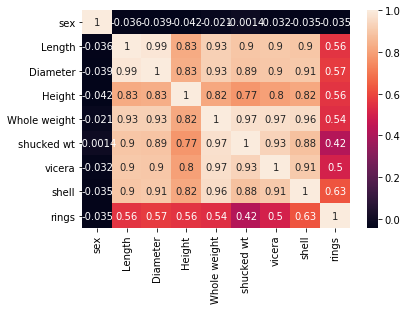

In [14]:
sns.heatmap(df1.corr(),annot=True)

In [16]:
df1.head()

,sex,Length,Diameter,Height,Whole weight,shucked wt,vicera,shell,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


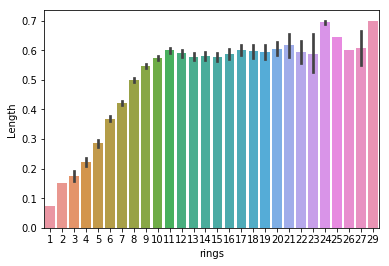

In [18]:
sns.barplot(x='rings',y='Length',data=df1)

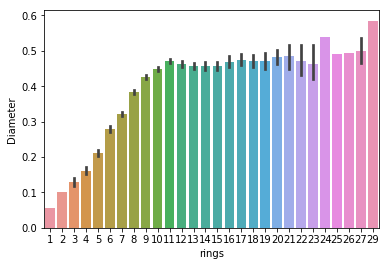

In [19]:
sns.barplot(x='rings',y='Diameter',data=df1)

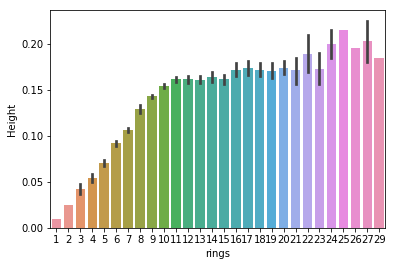

In [20]:
sns.barplot(x='rings',y='Height',data=df1)

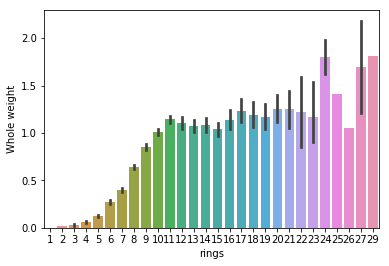

In [21]:
sns.barplot(x='rings',y='Whole weight',data=df1)

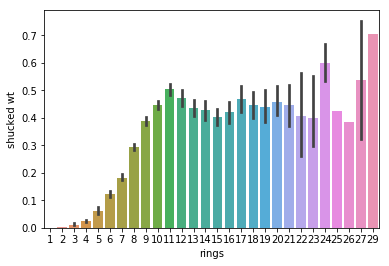

In [22]:
sns.barplot(x='rings',y='shucked wt',data=df1)

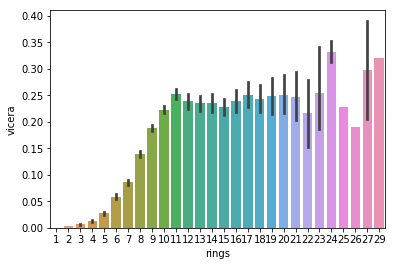

In [23]:
sns.barplot(x='rings',y='vicera',data=df1)

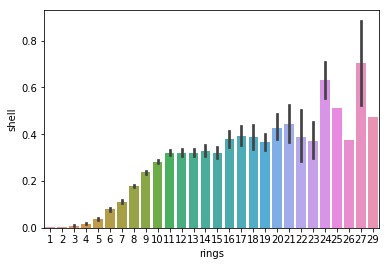

In [24]:
sns.barplot(x='rings',y='shell',data=df1)

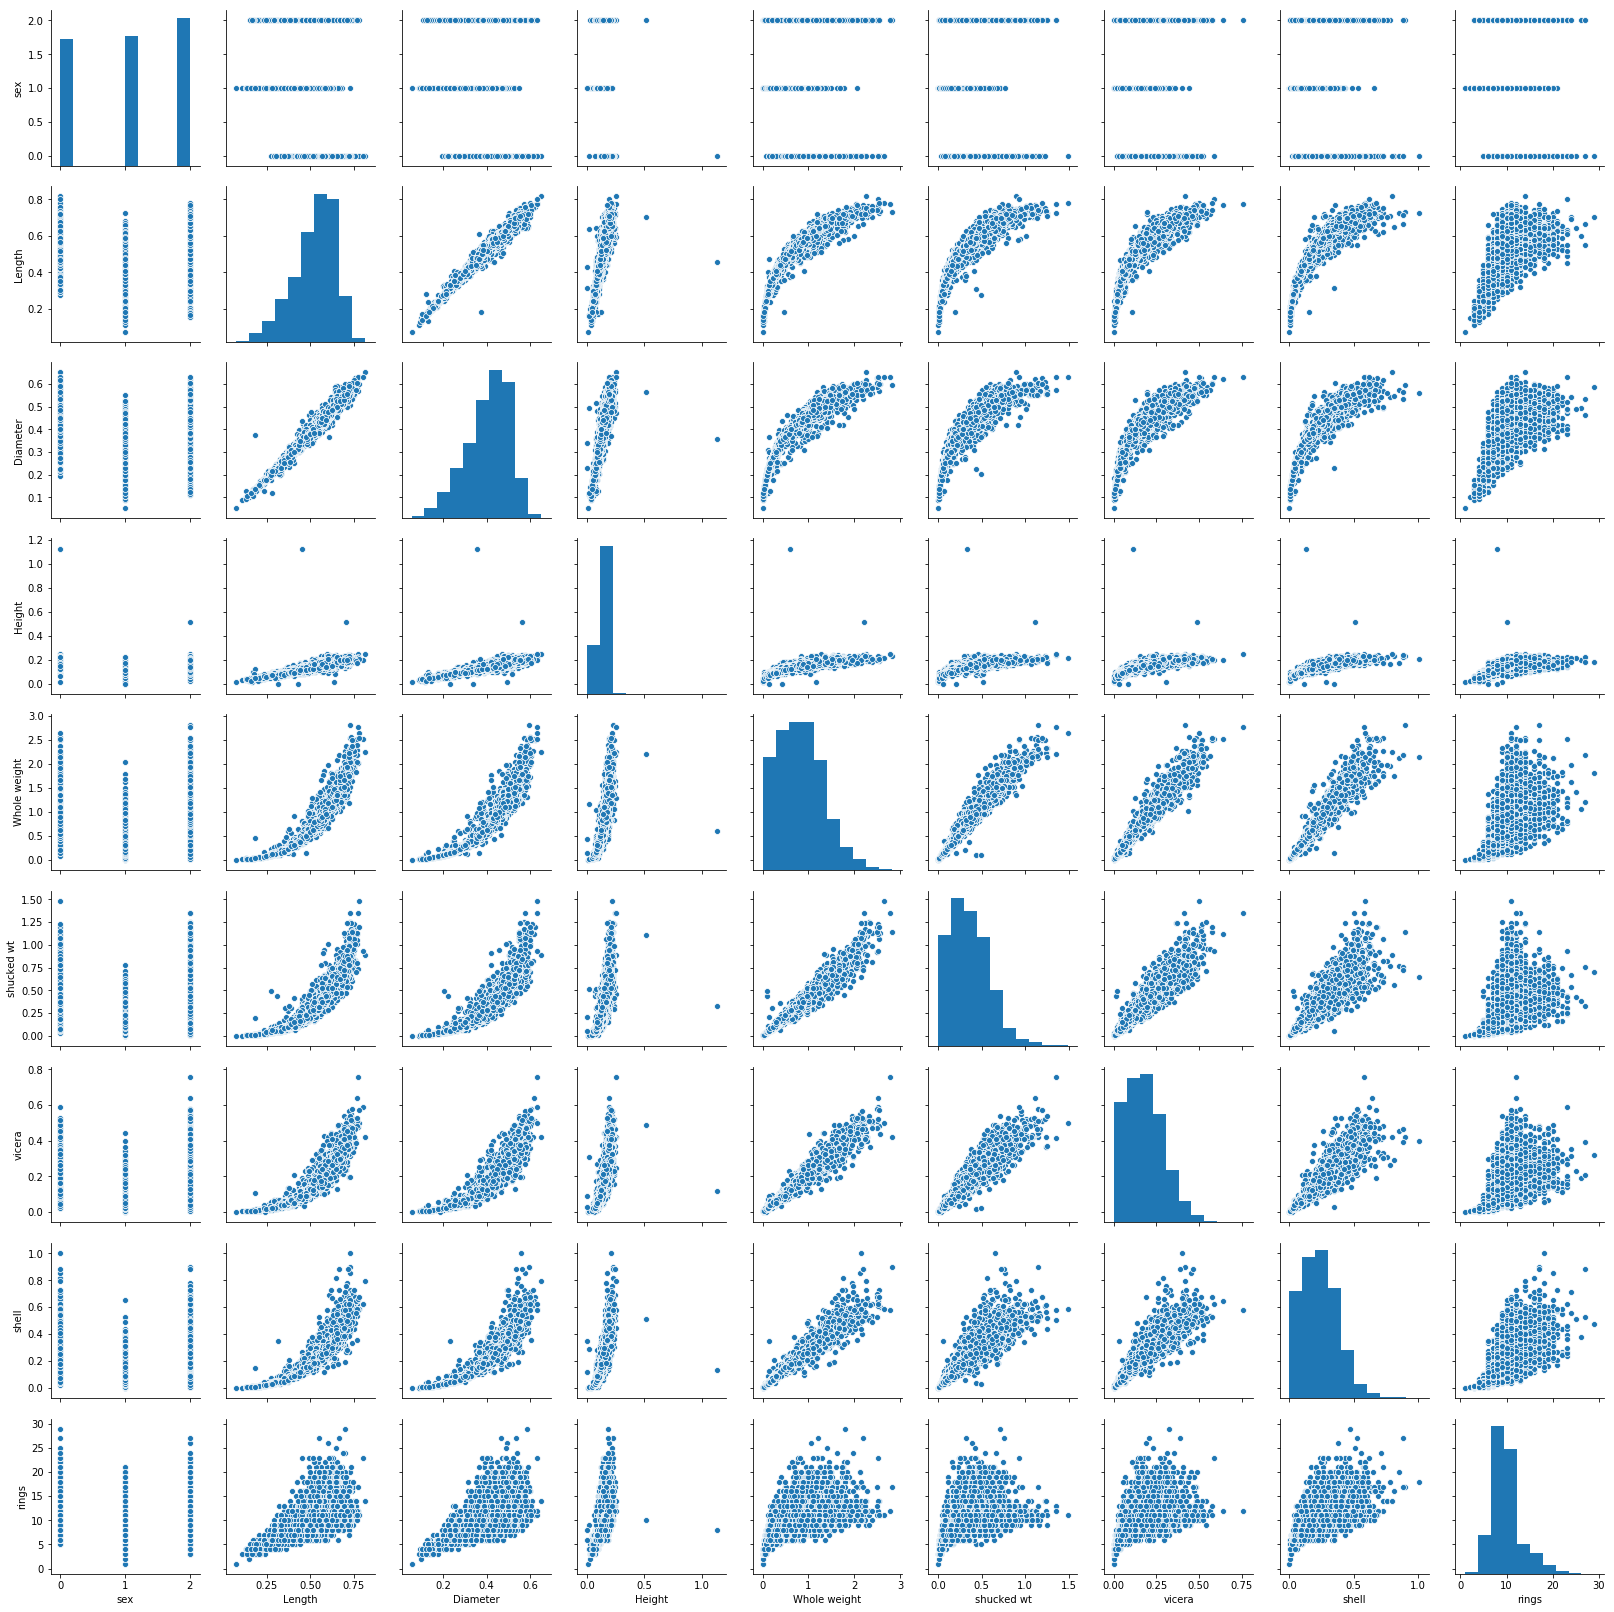

In [25]:
sns.pairplot(df1)

In [26]:
x = df1.drop('rings',axis=1)
y= df1['rings']

In [27]:
#scaling the imput variable
#Linearregression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
for m in model:
    max_r2_score(m,x,y)
    
    


LinearRegression() max r2 score corresponding to  43  is  0.5719430413889433
DecisionTreeRegressor() max r2 score corresponding to  100  is  0.265546006625768
RandomForestRegressor() max r2 score corresponding to  88  is  0.586604673230559
KNeighborsRegressor() max r2 score corresponding to  88  is  0.5451329293268912


In [31]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=84)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 88,test_size=0.20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.9338937472391604
rf_accuracy: 0.93


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[0.73240509 0.73931035 0.75311241 0.68694165 0.71148706]


In [33]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2.0968554720851404
r2_score is:  0.58606474944111


In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail()

,Actual,Predicted
3452,8,8.72
1653,10,8.87
4058,10,10.22
393,9,7.10
3804,7,6.26
